In [1]:
import numpy as np
import sys
sys.path.append('/home/katrina/a/mankovic/FlagIRLS/')
import center_algorithms as ca
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.manifold import MDS


# This script runs examples on Gr(1,2).

    


In [2]:
def load_data(num1: int, num2: int, num3: int = 0, numn: int = 0, n_std: int = 0, 
              n_mean: int = 0, std: float = .01, data_seed: int = 0) -> list:
    #keep this at 0
    np.random.seed(data_seed)

    data_array = []
    if num1 != 0:
        data_array = np.vstack([np.random.normal(0, std, num1), np.random.normal(1, std, num1)])
    if num2 != 0:
        Process2 = np.vstack([np.random.normal(.66, std, num2), np.random.normal(-.44, std, num2)])
        data_array = np.hstack([data_array, Process2])
    if num3 != 0:
        Process3 = np.vstack([np.random.normal(.66, std, num3), np.random.normal(-.33, std, num3)])
        data_array = np.hstack([data_array, Process3])
    if numn != 0:
        Processn = np.vstack([np.random.normal(1-n_mean, n_std, numn), np.random.normal(n_mean, n_std, numn)])
        if data_array != []:
            data_array = np.hstack([data_array, Processn])
        else:
            data_array = Processn

    fig = plt.figure()
    ax = fig.add_subplot(111)

    gr_list = []
    for i in range(data_array.shape[1]):
        point = data_array[:,[i]]
        gr_list.append(point/np.linalg.norm(point))
        plt.plot([-gr_list[i][0,0], gr_list[i][0,0]],[-gr_list[i][1,0],gr_list[i][1,0]], color = '.5', linestyle = 'dashed')

    plt.xlim(-1,1)
    plt.ylim(-1,1)
    ax.set_aspect('equal')
    return gr_list

In [3]:
def function_values(gr_list: list) -> tuple:
    #sample objective function values for points with in 100 degrees from [1,0]

    sinsq_err = []
    sin_err = []
    geo_err = []
    cos_err = []
    thetas = []

    sample_list = []
    for i in range(-320,320,1):
        theta = i/200
        thetas.append(theta)
        point = np.array([[np.cos(theta)], [np.sin(theta)]])
        sample_list.append(point/np.linalg.norm(point))
        
    for Y in sample_list:
    #     print(Y.shape)
        sinsq_err.append(ca.calc_error_1_2(gr_list, Y, 'sinesq'))
        sin_err.append(ca.calc_error_1_2(gr_list, Y, 'sine'))
        geo_err.append(ca.calc_error_1_2(gr_list, Y, 'geodesic'))
        cos_err.append(ca.calc_error_1_2(gr_list, Y, 'cosine'))
    
    errs = {'flag_mean': sinsq_err,
            'flag_median': sin_err,
            'l2_median': geo_err,
            'max_corr': cos_err}

    return thetas, sample_list, errs

In [4]:
def find_optimizers(thetas: list, sample_list: list, errs: dict) -> dict:
    prototypes = {}
    for prototype_name in errs:
        if prototype_name == 'max_corr':
            best_err_idx = np.argmax(errs[prototype_name])
        else:
            best_err_idx = np.argmin(errs[prototype_name])
        prototypes[prototype_name] = sample_list[best_err_idx]
    return prototypes


In [5]:
def plot_objective_function(errs: list, prototypes: dict, thetas: dict) -> None:
    #objective function value plots

    thetas_degrees = [t*180/np.pi for t in thetas]

    v_line_top = np.max([np.max(errs['flag_median']), np.max(errs['l2_median']), np.max(errs['flag_mean']), np.max(errs['max_corr'])])

    plt.figure()
    plt.plot(thetas_degrees, errs['flag_median'], label = 'Flag Median', color = 'blue', linestyle = 'solid')
    plt.plot(thetas_degrees, errs['max_corr'], label = 'Maximumally Correlated Flag', color = 'red', linestyle = 'dashed')
    plt.plot(thetas_degrees, errs['l2_median'], label = 'L2 Median', color = 'orange', linestyle = 'dashdot')
    plt.plot(thetas_degrees, errs['flag_mean'], label = 'Flag Mean', color = 'green', linestyle = 'dotted')
    plt.vlines(np.arctan(prototypes['flag_median'][1]/prototypes['flag_median'][0])*180/np.pi, 0, v_line_top, color = 'blue', linestyle = 'solid')
    plt.vlines(np.arctan(prototypes['max_corr'][1]/prototypes['max_corr'][0])*180/np.pi, 0, v_line_top, color = 'red', linestyle = 'dashed')
    plt.vlines(np.arctan(prototypes['l2_median'][1]/prototypes['l2_median'][0])*180/np.pi, 0, v_line_top, color = 'orange', linestyle = 'dashdot')
    plt.vlines(np.arctan(prototypes['flag_mean'][1]/prototypes['flag_mean'][0])*180/np.pi, 0, v_line_top, color = 'green', linestyle = 'dotted')
    plt.legend()
    plt.xlabel('Angle from Horizontal Axis (degrees)')
    plt.ylabel('Objective Function Value')



In [6]:
def plot_points(gr_list: list, prototypes: dict) -> None:
    #plot point distribution and optimizers

    fig = plt.figure()
    ax = fig.add_subplot(111)

    for i in range(len(gr_list)):
        plt.plot([-gr_list[i][0,0], gr_list[i][0,0]],[-gr_list[i][1,0],gr_list[i][1,0]], color = '.5', linestyle = 'dashed')

    plt.plot([-prototypes['flag_median'][0,0], prototypes['flag_median'][0,0]],
            [-prototypes['flag_median'][1,0], prototypes['flag_median'][1,0]], 
            color = 'tab:blue', label = 'Flag Median')
    plt.plot([-prototypes['max_corr'][0,0], prototypes['max_corr'][0,0]],
            [-prototypes['max_corr'][1,0], prototypes['max_corr'][1,0]], 
            color = 'tab:red', label = 'Maximally Correlated Flag', linestyle = 'dashed')
    plt.plot([-prototypes['l2_median'][0,0], prototypes['l2_median'][0,0]],
            [-prototypes['l2_median'][1,0], prototypes['l2_median'][1,0]],
            color = 'tab:orange', linestyle = 'dashdot', label = 'L2 Median')
    plt.plot([-prototypes['flag_mean'][0,0], prototypes['flag_mean'][0,0]],
            [-prototypes['flag_mean'][1,0], prototypes['flag_mean'][1,0]],
            color = 'tab:green', linestyle = 'dotted', label = 'Flag Mean')

    plt.xlim(-1,1)
    plt.ylim(-1,1)
    ax.set_aspect('equal')
#     plt.legend()
    plt.axis('off')#plot point distribution and optimizers



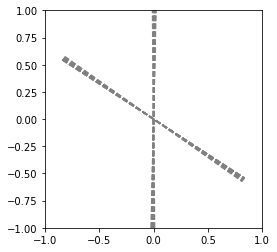

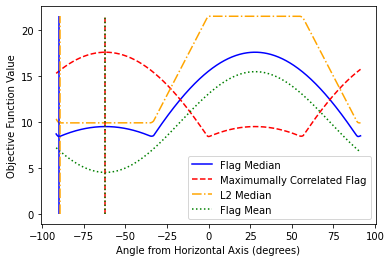

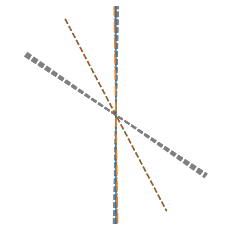

In [7]:
#number of points in each class
num1 = 10
num2 = 10

#standard deviation of each cluster
std =.01

#random number seed
seed = 1

#points in Gr(k,n)
k=1

#number of iterations for FlagIRLS
n_its = 1000

gr_list = load_data(num1, num2, num3 = 0, numn = 0, n_std = 0, n_mean = 0, std = .01, data_seed= 0)
thetas, sample_list, errs = function_values(gr_list)
prototypes =  find_optimizers(thetas, sample_list, errs)
plot_objective_function(errs, prototypes, thetas)
plot_points(gr_list, prototypes)

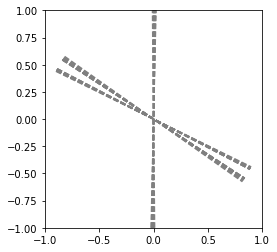

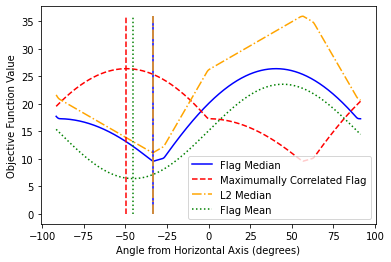

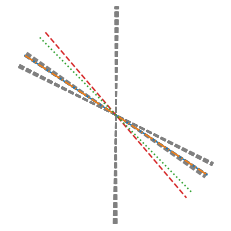

In [8]:
#number of points in each class
num1 = 10
num2 = 10
num3 = 10

#bonus class where we can define mean and standard deviation
numn = 0
n_std = .1
n_mean = .5

#standard deviation of each cluster
std =.01

#random number seed
seed = 1

#points in Gr(k,n)
k=1

#number of iterations for FlagIRLS
n_its = 1000

gr_list = load_data(num1, num2, num3, numn = 0, n_std = 0, n_mean = 0, std = .01, data_seed= 0)
thetas, sample_list, errs = function_values(gr_list)
prototypes =  find_optimizers(thetas, sample_list, errs)
plot_objective_function(errs, prototypes, thetas)
plot_points(gr_list, prototypes)

# 3D Example

In [9]:
def function_values(gr_list: list) -> tuple:
    #sample objective function values for points with in 100 degrees from [1,0]

    sinsq_err = []
    sin_err = []
    geo_err = []
    cos_err = []

    angles = []

    sample_list = []
    for i in range(-320,320,1):
        theta = i/200
        for j in range(-320,320,1):
            phi = j/200
            angles.append([theta,phi])
            point = np.array([[np.sin(phi)*np.cos(theta)], 
                              [np.sin(phi)*np.sin(theta)], 
                              [np.cos(phi)]])
            normed_point = point/np.linalg.norm(point)
            normed_point[2] = np.abs(normed_point[2])
            sample_list.append(normed_point)
        
    for Y in sample_list:
    #     print(Y.shape)
        sinsq_err.append(ca.calc_error_1_2(gr_list, Y, 'sinesq'))
        sin_err.append(ca.calc_error_1_2(gr_list, Y, 'sine'))
        geo_err.append(ca.calc_error_1_2(gr_list, Y, 'geodesic'))
        cos_err.append(ca.calc_error_1_2(gr_list, Y, 'cosine'))
    
    errs = {'Flag Mean': sinsq_err,
            'Flag Median': sin_err,
            'L2 Median': geo_err,
            'Max Cor Flag': cos_err}

    return angles, sample_list, errs

In [10]:
def plot_result(sample_array, errs, prototype_name):


    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(projection='3d')
    ax.view_init(azim=00, elev=90)

    frame = [np.array([[np.sqrt(2/3)],[0], [np.sqrt(1/3)]]),
          np.array([[0],[np.sqrt(2/3)], [np.sqrt(1/3)]]),
          np.array([[-np.sqrt(2/3)],[0], [np.sqrt(1/3)]]),
          np.array([[0],[-np.sqrt(2/3)], [np.sqrt(1/3)]])]

    frame_array = np.hstack(frame)
    

#     plt.title(prototype_name)
    p = ax.scatter(sample_array[0,:], sample_array[1,:], sample_array[2,:], c = errs[prototype_name], cmap='viridis')
    ax.scatter(frame_array[0,:], frame_array[1,:], frame_array[2,:]+2, c = 'r', s = 100)
    fig.colorbar(p, ax = ax)
    plt.show()

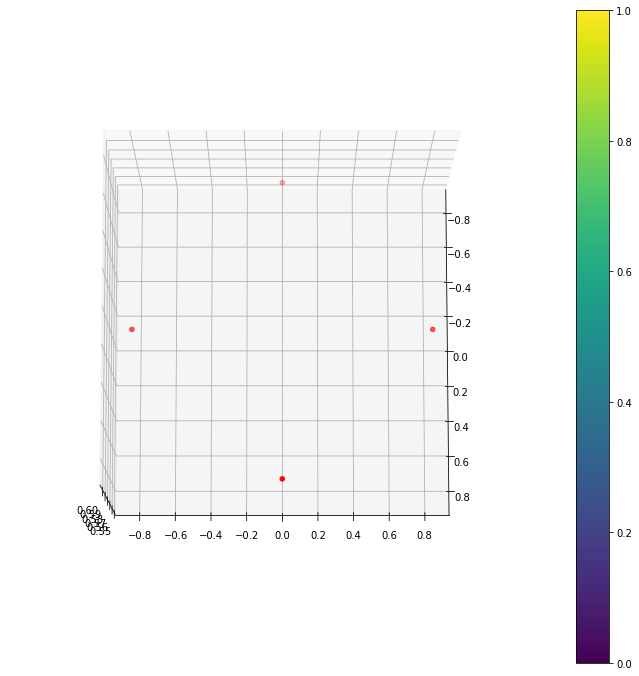

In [11]:

frame = [np.array([[np.sqrt(2/3)],[0], [np.sqrt(1/3)]]),
        np.array([[0],[np.sqrt(2/3)], [np.sqrt(1/3)]]),
        np.array([[-np.sqrt(2/3)],[0], [np.sqrt(1/3)]]),
        np.array([[0],[-np.sqrt(2/3)], [np.sqrt(1/3)]])]

frame_array = np.hstack(frame)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.view_init(azim=0, elev=80)

p = ax.scatter(frame_array[0,:], frame_array[1,:], frame_array[2,:], c = 'r')
fig.colorbar(p, ax = ax)
plt.show()

In [12]:
angles, sample_list, errs = function_values(frame)

sample_array = np.hstack(sample_list)

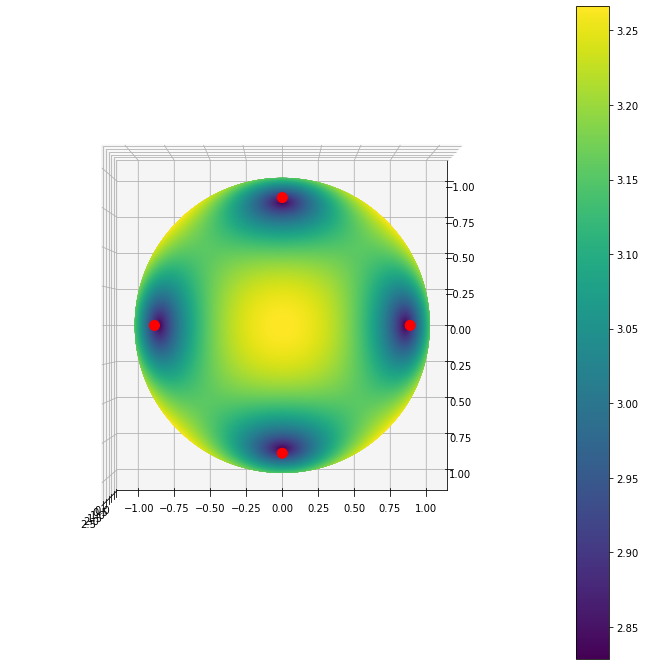

In [13]:

plot_result(sample_array, errs, 'Flag Median')


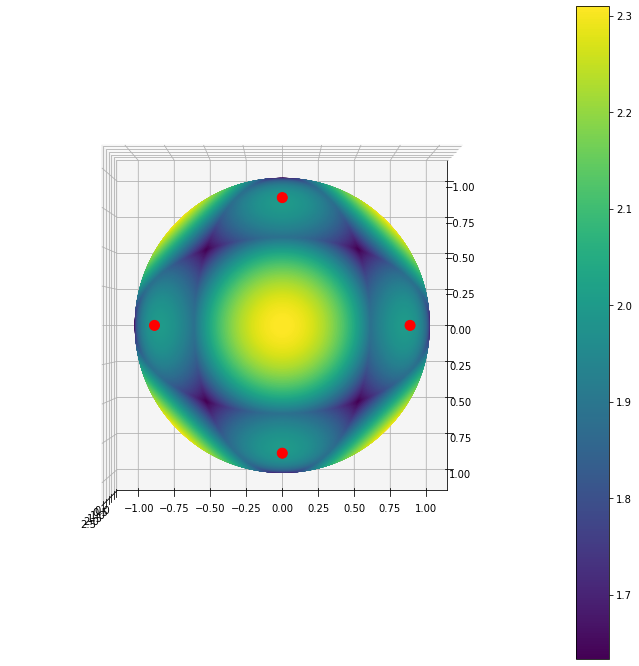

In [14]:
plot_result(sample_array, errs, 'Max Cor Flag')

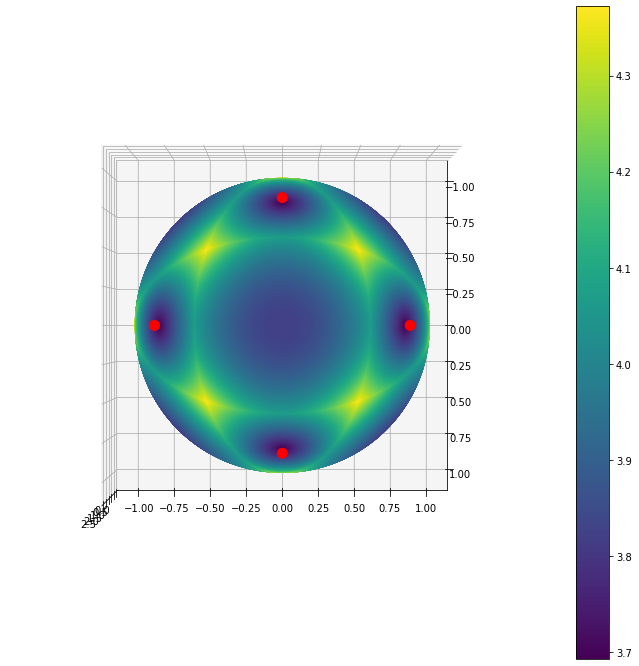

In [15]:
plot_result(sample_array, errs, 'L2 Median')

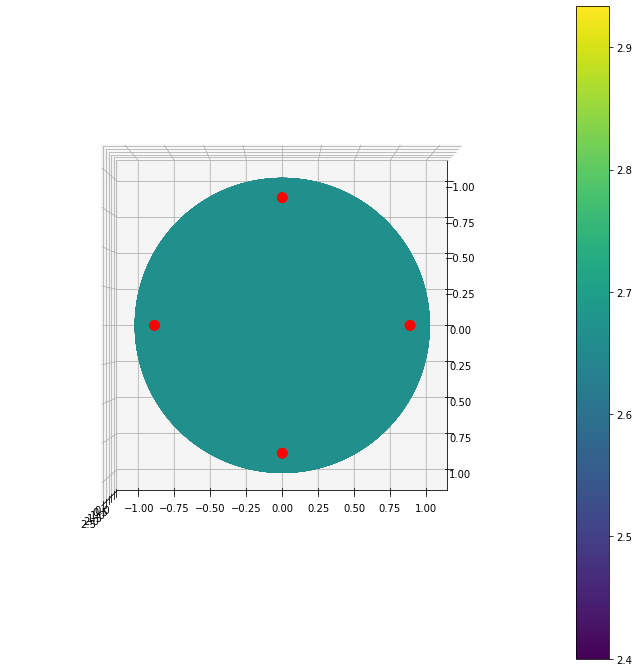

In [16]:
plot_result(sample_array, errs, 'Flag Mean')

# Gr(5,10)

In [2]:
'''
This function verifies that we found a local optimizer for
the sine median or maximum cosine problem.
It does this by checking 100 points around the optimizer.

Inputs: 
    optimizer- a numpy array that represente the suggested optimizer
    opf_fn- a string, 'sine' for sine median and 'cosine' for maximum cosine
    data- a list of numpy arrays representing points on grassmannians
Outputs:
    local optimizer- True if all checked points rsesult in objective function values
                        that are greater than the Sine Median problem or smaller than
                        the Maximum Cosine value
'''
def objective_function_values(data, center_rep, n_random_pts, r = 5, n = 20):
    #checking random points
    errs = []
    random_points = []
    for i in range(n_random_pts):        
        #random points between -.5 and .5 times .01
        random_point_raw = center_rep + (np.random.rand(n,r)-.5)*.5
        random_point = np.linalg.qr(random_point_raw)[0][:,:r]
        random_points.append(random_point)
    
    
    sinsq_err = []
    sin_err = []
    geo_err = []
    cos_err = []
    for Y in random_points:
    #     print(Y.shape)
        sinsq_err.append(ca.calc_error_1_2(data, Y, 'sinesq'))
        sin_err.append(ca.calc_error_1_2(data, Y, 'sine'))
        geo_err.append(ca.calc_error_1_2(data, Y, 'l2_med'))
        cos_err.append(ca.calc_error_1_2(data, Y, 'cosine'))
    
    errs = {'Flag Mean': sinsq_err,
            'Flag Median': sin_err,
            'L2 Median': geo_err,
            'Max Cor Flag': cos_err}

    return errs, random_points

In [3]:


k=5 #Gr(k1,n)
r=5
n=50
num_points = 30 #number of points in dataset
n_outliers = 10

n_random_pts = 5000
# n_random_pts = 0

np.random.seed(0)

center = np.random.rand(n,k)*10
center_rep = np.linalg.qr(center)[0][:,:k]

outlier_center = np.random.rand(n,k)*10
outlier_center_rep = np.linalg.qr(outlier_center)[0][:,:k]

#generate dataset of points in Gr(k,n)


print('generating data')
print('.\n.\n.')
gr_list = []
for i in range(num_points-n_outliers):
    Y_raw = center_rep + (np.random.rand(n,k)-.5)*.05
    Y = np.linalg.qr(Y_raw)[0][:,:k]
    gr_list.append(Y)

for i in range(n_outliers):
    Y_raw = outlier_center_rep + (np.random.rand(n,k)-.5)*.05
    Y = np.linalg.qr(Y_raw)[0][:,:k]
    gr_list.append(Y)

center_clusters_rep = (center_rep + outlier_center)/2
center_clusters_rep = center_clusters_rep/np.linalg.norm(center_clusters_rep)

print('----------------')
print('calculating objective function values')
print('.\n.\n.')
errs, random_points = objective_function_values(gr_list, center_clusters_rep, n_random_pts, r, n)

print('----------------')
print('calculating central prototypes')
print('.\n.\n.')
central_prototype_ids = {}
for prototype_name in errs:
    print(prototype_name)
    if prototype_name == 'max_corr':
        best_idx = np.argmax(errs[prototype_name ])
    else:
        best_idx = np.argmin(errs[prototype_name ])
    central_prototype_ids[prototype_name] = best_idx
print('prototype ids are: ')
print(central_prototype_ids)

# the_prototypes = [random_points[ii] for _, ii in central_prototype_ids.items()]

for name in central_prototype_ids.items():
    print(name)


all_points = random_points + gr_list
# all_points = the_prototypes + gr_list

print('----------------')
print('calculating distance matrix')
print('.\n.\n.')
total_p = len(all_points)
D = np.zeros((total_p, total_p))
for i in range(total_p):
    print(f'point {i} finished')
    for j in range(i+1,total_p):
        D[i,j] = ca.calc_error_1_2([all_points[i]], all_points[j], sin_cos = 'l2_med')
        D[j,i] = D[i,j].copy()

# fig = plt.figure()
# im = plt.imshow(D, cmap = 'pink')
# fig.colorbar(im)
# plt.title('Chordal Distance Between Data Points')



generating data
.
.
.
----------------
calculating objective function values
.
.
.
----------------
calculating central prototypes
.
.
.
Flag Mean
Flag Median
L2 Median
Max Cor Flag
prototype ids are: 
{'Flag Mean': 1709, 'Flag Median': 1709, 'L2 Median': 589, 'Max Cor Flag': 3993}
('Flag Mean', 1709)
('Flag Median', 1709)
('L2 Median', 589)
('Max Cor Flag', 3993)
----------------
calculating distance matrix
.
.
.
point 0 finished
point 1 finished
point 2 finished
point 3 finished
point 4 finished
point 5 finished
point 6 finished
point 7 finished
point 8 finished
point 9 finished
point 10 finished
point 11 finished
point 12 finished
point 13 finished
point 14 finished
point 15 finished
point 16 finished
point 17 finished
point 18 finished
point 19 finished
point 20 finished
point 21 finished
point 22 finished
point 23 finished
point 24 finished
point 25 finished
point 26 finished
point 27 finished
point 28 finished
point 29 finished
point 30 finished
point 31 finished
point 32 finishe

KeyboardInterrupt: 

In [ ]:

embedding = MDS(n_components=2, dissimilarity='precomputed')
X_transformed = embedding.fit_transform(D)

In [ ]:

central_prototype_ids['Flag Mean'] = central_prototype_ids.pop('flag_mean')
central_prototype_ids['Flag Median'] = central_prototype_ids.pop('flag_median')
central_prototype_ids['L2 Median'] = central_prototype_ids.pop('l2_median')
central_prototype_ids['Max Cor Flag'] = central_prototype_ids.pop('max_corr')

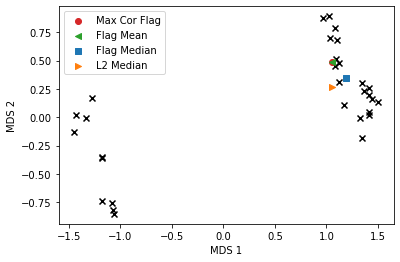

In [ ]:

colors = {'Flag Median':'tab:blue', 'Max Cor Flag':'tab:red', 'L2 Median':'tab:orange', 'Flag Mean':'tab:green'}
prototype_names = {'Flag Median':0, 'Max Cor Flag':1, 'L2 Median':2, 'Flag Mean':3}
markers = {'Flag Median':'s', 'Max Cor Flag':'o', 'L2 Median':'>', 'Flag Mean':'<'}
plt.figure()
plt.scatter(X_transformed[n_random_pts:,0], X_transformed[n_random_pts:,1], c = 'k', marker = 'x')
for prototype_name in {'Flag Median', 'Max Cor Flag', 'L2 Median', 'Flag Mean'}:
    plt.scatter(X_transformed[central_prototype_ids[prototype_name],0], X_transformed[central_prototype_ids[prototype_name],1], c = colors[prototype_name], label = prototype_name, marker = markers[prototype_name])
plt.xlabel('MDS 1')
plt.ylabel('MDS 2')
plt.legend()